## Libraries

In [1]:
import json

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import WordCloud

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
from torchvision.transforms import functional as F


## Dataset

Annotations

In [2]:
with open('./Dataset/SSID_Annotations/SSID_Train.json') as f:
    train_data = json.load(f)
    
with open('./Dataset/SSID_Annotations/SSID_Test.json') as f:
    test_data = json.load(f)

with open('./Dataset/SSID_Annotations/SSID_Validation.json') as f:
    val_data = json.load(f)

Convert to DataFrame

In [3]:
flattened_data = [item for sublist in train_data['annotations'] for item in sublist]
train_df = pd.DataFrame(flattened_data)

flattened_data = [item for sublist in test_data['annotations'] for item in sublist]
test_df = pd.DataFrame(flattened_data)

flattened_data = [item for sublist in val_data['annotations'] for item in sublist]
val_df = pd.DataFrame(flattened_data)

In [4]:
train_df

storylet_id                                          storytext  \
0             5887  Today I am in my friends house and he is very ...   
1             5888                    He is telling me about his car.   
2             5889          He is telling me about his car's feature.   
3             5890  The car color is white and it looks awesome an...   
4             5891  Now he is telling me about all doors and seats...   
...            ...                                                ...   
62495        41431                                Seem like two girls   
62496        41432                   One man is starting to space off   
62497        41433                               The girls seem happy   
62498        41434                 The man is on the couch with them.   
62499        41435         He is laying down now and it was good day.   

      youtube_image_id  album_id  story_id  image_order  
0                 2001     10856      5887            1  
1                 2002     10856      5887            2  
2                 2003     10856      5887            3  
3                 2004     10856      5887            4  
4                 2005     10856      5887            5  
...                ...       ...       ...          ...  
62495            16996     25851     41431            1  
62496            16997     25851     41431            2  
62497            16998     25851     41431            3  
62498            16999     25851     41431            4  
62499            17000     25851     41431            5  

[62500 rows x 6 columns]

## Visualistion

In [5]:
train_df['storytext_length'] = train_df['storytext'].apply(lambda x: len(x.split()))
test_df['storytext_length'] = test_df['storytext'].apply(lambda x: len(x.split()))
val_df['storytext_length'] = val_df['storytext'].apply(lambda x: len(x.split()))


In [6]:
train_df 

storylet_id                                          storytext  \
0             5887  Today I am in my friends house and he is very ...   
1             5888                    He is telling me about his car.   
2             5889          He is telling me about his car's feature.   
3             5890  The car color is white and it looks awesome an...   
4             5891  Now he is telling me about all doors and seats...   
...            ...                                                ...   
62495        41431                                Seem like two girls   
62496        41432                   One man is starting to space off   
62497        41433                               The girls seem happy   
62498        41434                 The man is on the couch with them.   
62499        41435         He is laying down now and it was good day.   

      youtube_image_id  album_id  story_id  image_order  storytext_length  
0                 2001     10856      5887            1                14  
1                 2002     10856      5887            2                 7  
2                 2003     10856      5887            3                 8  
3                 2004     10856      5887            4                11  
4                 2005     10856      5887            5                13  
...                ...       ...       ...          ...               ...  
62495            16996     25851     41431            1                 4  
62496            16997     25851     41431            2                 7  
62497            16998     25851     41431            3                 4  
62498            16999     25851     41431            4                 8  
62499            17000     25851     41431            5                10  

[62500 rows x 7 columns]

In [7]:
test_df

storylet_id                                          storytext  \
0            5947  Inside the car with his family he talks with e...   
1            5948  While his kids are using their gamers to play ...   
2            5949  A drone takes a picture of the car moving on a...   
3            5950  From the car window you can see a power plant ...   
4            5951  The family arrives at their destination and is...   
...           ...                                                ...   
3475        40908               A dirt bike rider rides down a hill.   
3476        40909  Another rider in orange does a wheelie down a ...   
3477        40910  The rider in orange flies through the air over...   
3478        40911  Another rider is close behind the rider in ora...   
3479        40912                       A girl cheers the racers on!   

     youtube_image_id  album_id  story_id  image_order  storytext_length  
0                2036     10891      5947            1                10  
1                2037     10891      5947            2                10  
2                2038     10891      5947            3                14  
3                2039     10891      5947            4                13  
4                2040     10891      5947            5                13  
...               ...       ...       ...          ...               ...  
3475            16761     25616     40908            1                 8  
3476            16762     25616     40908            2                11  
3477            16763     25616     40908            3                11  
3478            16764     25616     40908            4                 9  
3479            16765     25616     40908            5                 6  

[3480 rows x 7 columns]

In [8]:
val_df

storylet_id                                          storytext  \
0            6236          Gettinv ready to take off with the family   
1            6237                 The water is beautiful  as we rise   
2            6238                      Selfy with eveyone as we rise   
3            6239            We're so high even the boat looks small   
4            6240   Awe it was a great ride cant wait to go up again   
...           ...                                                ...   
3475        41362  The ballet school had a very long stairway to ...   
3476        41363  The inside was adorned with dancer figurines a...   
3477        41364  Inside the studio stood a group of girls in th...   
3478        41365  Their adult teacher at first seemed stern and ...   
3479        41366  As she directed the girls, she smiled and the ...   

     youtube_image_id  album_id  story_id  image_order  storytext_length  
0                2201     11056      6236            1                 8  
1                2202     11056      6236            2                 7  
2                2203     11056      6236            3                 6  
3                2204     11056      6236            4                 8  
4                2205     11056      6236            5                12  
...               ...       ...       ...          ...               ...  
3475            16966     25821     41362            1                12  
3476            16967     25821     41362            2                13  
3477            16968     25821     41362            3                18  
3478            16969     25821     41362            4                16  
3479            16970     25821     41362            5                16  

[3480 rows x 7 columns]

### Histogram

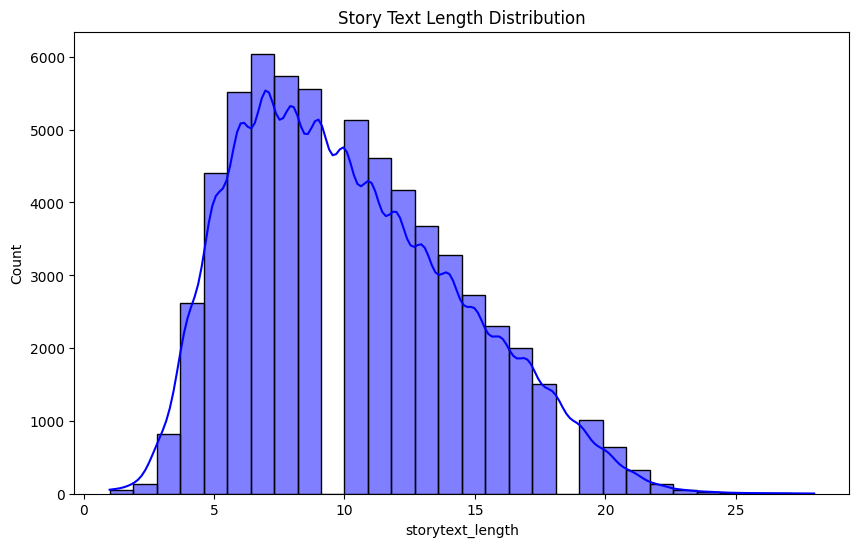

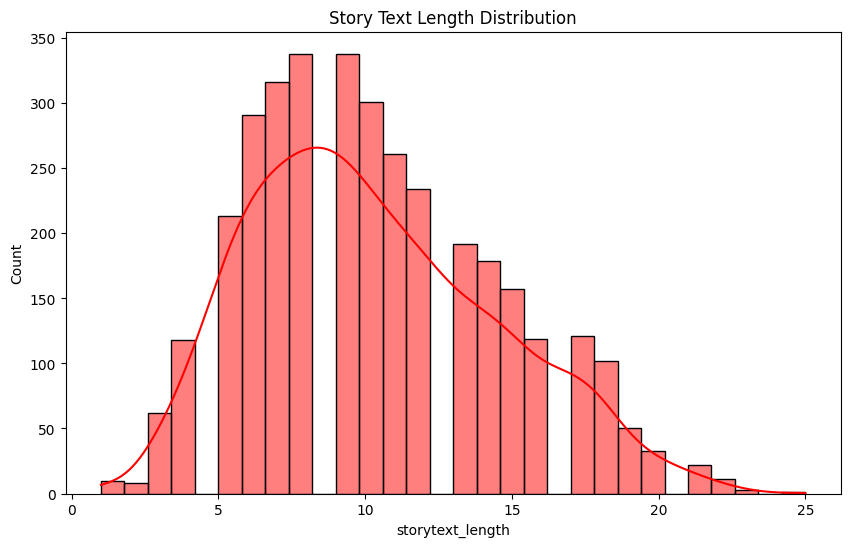

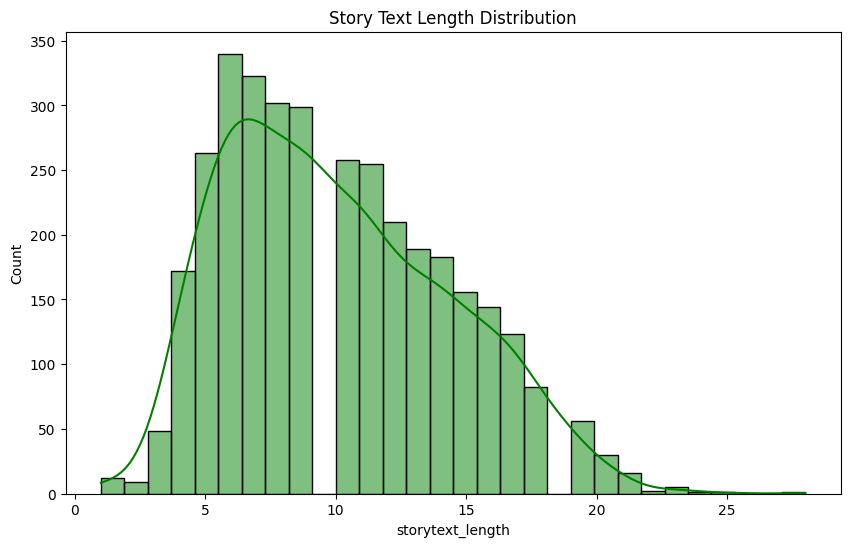

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['storytext_length'], kde=True, color='blue', bins=30)
plt.title('Story Text Length Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(test_df['storytext_length'], kde=True, color='red', bins=30)
plt.title('Story Text Length Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(val_df['storytext_length'], kde=True, color='green', bins=30)
plt.title('Story Text Length Distribution')
plt.show()


In [10]:
train_df['storytext_length'].describe()

count    62500.000000
mean        10.164656
std          4.196830
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         28.000000
Name: storytext_length, dtype: float64

In [11]:
test_df['storytext_length'].describe()

count    3480.000000
mean       10.259770
std         4.210308
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        25.000000
Name: storytext_length, dtype: float64

In [12]:
val_df['storytext_length'].describe()

count    3480.000000
mean       10.044828
std         4.287290
min         1.000000
25%         7.000000
50%         9.000000
75%        13.000000
max        28.000000
Name: storytext_length, dtype: float64

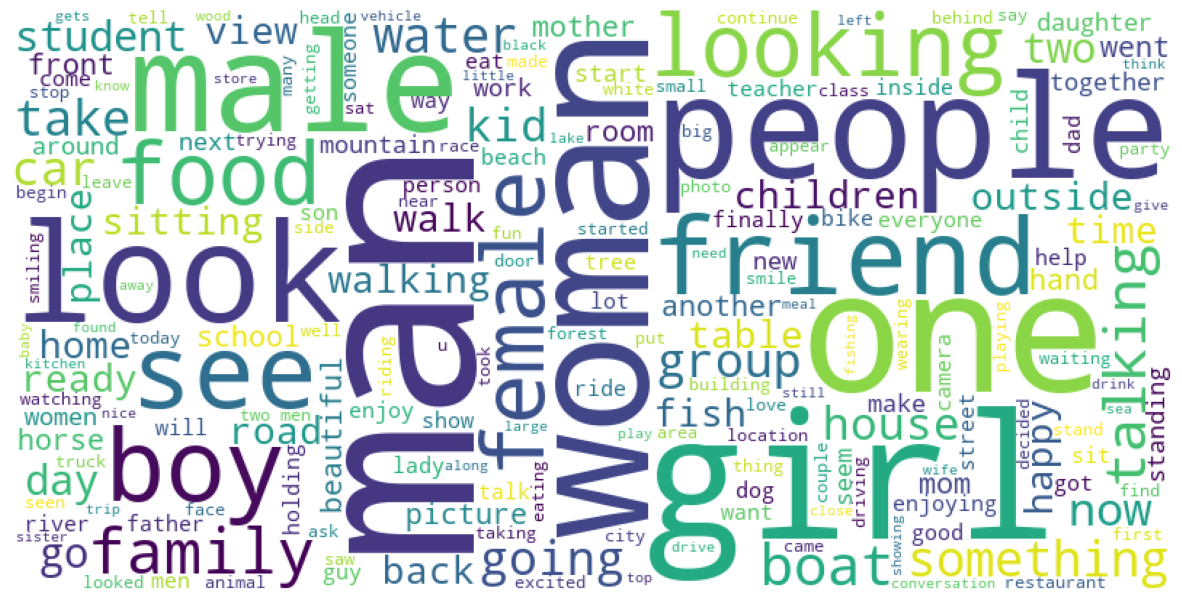

In [13]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['storytext']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


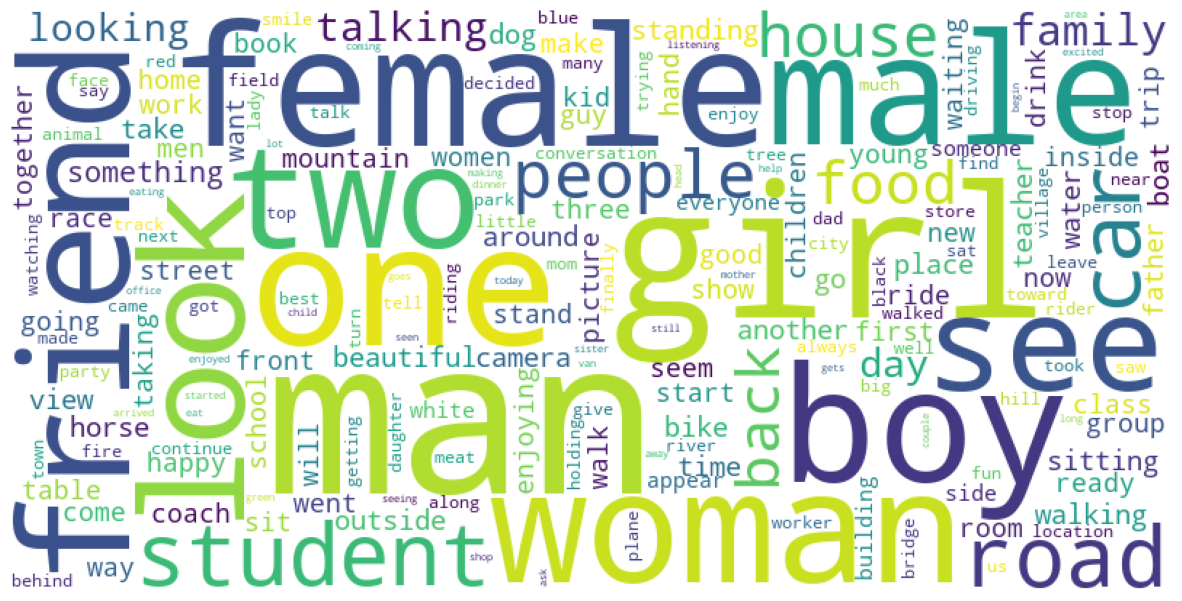

In [14]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(test_df['storytext']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

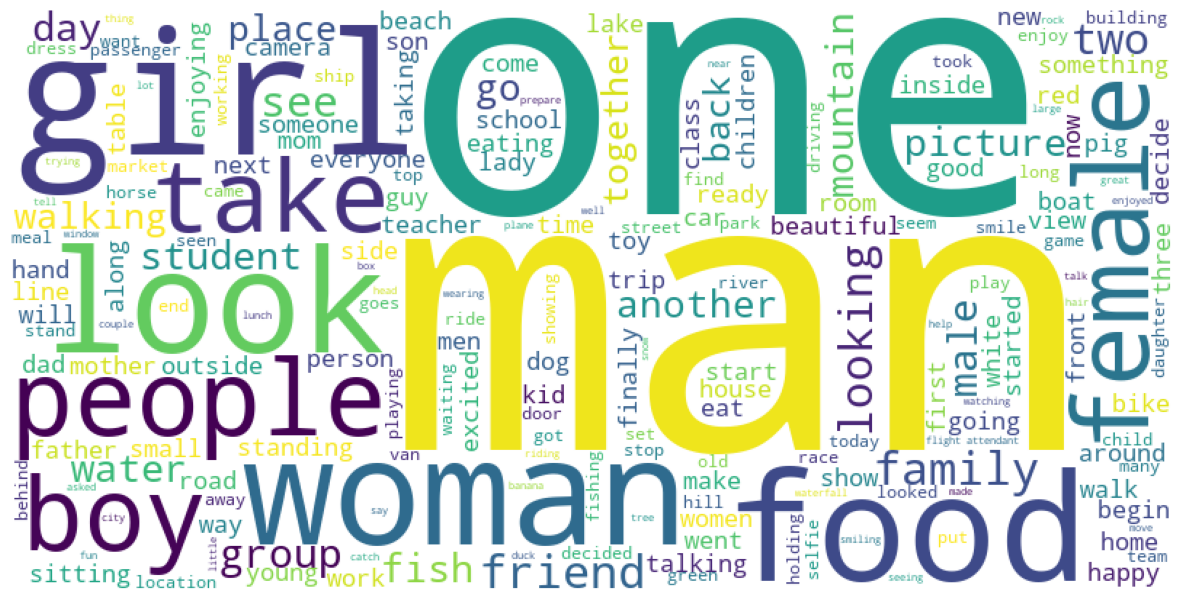

In [15]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(val_df['storytext']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
    

## **Reinforcement Learning Based Story Generation**

### Import Libraries

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, BlipProcessor, BlipForConditionalGeneration, CLIPProcessor, CLIPModel
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

from nltk.translate.bleu_score import sentence_bleu
from transformers import CLIPProcessor, CLIPModel
from rake_nltk import Rake
from PIL import Image

from rouge_score import rouge_scorer

Load GPT-2 Model and Tokenizer

In [ ]:

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.train()  # Set the model in training mode

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

C:\Users\ksubh\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [20]:
generated_captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

In [ ]:
def generate_story(captions, max_length=100):
    # Concatenate captions to form a prompt
    prompt = " ".join(captions)
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    
    # Generate story based on the prompt
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)
    story = tokenizer.decode(output[0], skip_special_tokens=True)
    return story

In [ ]:
def calculate_rouge_score(generated_story, ground_truth_story):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(ground_truth_story, generated_story)
    rouge1 = scores['rouge1'].fmeasure
    rouge2 = scores['rouge2'].fmeasure
    rougeL = scores['rougeL'].fmeasure
    return (rouge1 + rouge2 + rougeL) / 3  # Average of ROUGE scores

def calculate_cosine_similarity(topic1, topic2):
    topic1 = torch.tensor(topic1)
    topic2 = torch.tensor(topic2)
    return F.cosine_similarity(topic1.unsqueeze(0), topic2.unsqueeze(0), dim=1).mean().item()

def total_reward(generated_story, ground_truth_story, topicc, topicv, topicl, lambda_=1.0, gamma=1.0, eta=1.0):
    rrouge = calculate_rouge_score(generated_story, ground_truth_story)
    rtopic_cv = calculate_cosine_similarity(topicc, topicv)
    rtopic_cl = calculate_cosine_similarity(topicc, topicl)
    return lambda_ * rrouge + gamma * rtopic_cv + eta * rtopic_cl                

### Extract Topics from Ground Stories

In [ ]:
# Load the CLIP model and processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def extract_topics(story_text):
    """
    Generates an overall feature vector for a story text by averaging the CLIP feature vectors
    of keywords extracted using RAKE.

    Args:
        story_text (str): The story text.

    Returns:
        torch.Tensor: Averaged feature vector representing the story text.
    """
    # Initialize RAKE for keyword extraction
    rake = Rake()
    rake.extract_keywords_from_text(story_text)
    keywords = rake.get_ranked_phrases()  # Get the keywords extracted by RAKE

    # Function to encode a keyword into a feature vector using CLIP
    def encode_keyword(keyword):
        text_inputs = clip_processor(text=[keyword], return_tensors="pt", padding=True)
        text_features = clip_model.get_text_features(**text_inputs)
        return text_features

    # Encode each keyword and store the vectors
    keyword_vectors = []
    for keyword in keywords:
        vector = encode_keyword(keyword)
        keyword_vectors.append(vector)

    # Calculate the final feature vector by averaging the keyword vectors
    overall_feature_vector = torch.mean(torch.stack(keyword_vectors), dim=0)
    
    return overall_feature_vector


### Extract Topics from Images

In [ ]:
# Load the BLIP model for caption generation
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load the CLIP model for feature extraction
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def extract_topics_from_image(image_paths):
    """
    Generates an overall feature vector for a list of images by averaging the CLIP feature vectors
    of BLIP-generated captions for each image.

    Args:
        image_paths (list): List of image file paths.

    Returns:
        torch.Tensor: Averaged feature vector representing the input images.
    """
    # Function to generate a caption (concept) for each image
    def generate_concept(image_path):
        image = Image.open(image_path).convert("RGB")
        inputs = blip_processor(images=image, return_tensors="pt")
        caption_ids = blip_model.generate(**inputs)
        caption = blip_processor.decode(caption_ids[0], skip_special_tokens=True)
        return caption

    # Function to encode captions into feature vectors using CLIP
    def encode_concept(concept):
        text_inputs = clip_processor(text=[concept], return_tensors="pt", padding=True)
        text_features = clip_model.get_text_features(**text_inputs)
        return text_features

    # Generate concepts for each image and encode them
    concept_vectors = []
    for path in image_paths:
        concept = generate_concept(path)
        vector = encode_concept(concept)
        concept_vectors.append(vector)

    # Calculate the final feature vector by averaging
    overall_feature_vector = torch.mean(torch.stack(concept_vectors), dim=0)
    
    return overall_feature_vector

# Example usage
image_paths = [
    'Dataset/SSID_Images//1.jpg',
    'Dataset/SSID_Images//2.jpg',
    'Dataset/SSID_Images//3.jpg',
    'Dataset/SSID_Images//4.jpg',
    'Dataset/SSID_Images//5.jpg'
]


### Extract Topics from Generated Stories

In [ ]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def extract_topics_from_captions(captions):
    """
    Generates an overall feature vector for a list of captions by averaging the CLIP feature vectors.

    Args:
        captions (list): List of caption strings.

    Returns:
        torch.Tensor: Averaged feature vector representing the captions.
    """
    # Function to encode a caption into a feature vector using CLIP
    def encode_caption(caption):
        text_inputs = clip_processor(text=[caption], return_tensors="pt", padding=True)
        text_features = clip_model.get_text_features(**text_inputs)
        return text_features

    # Encode each caption and store the vectors
    caption_vectors = [encode_caption(caption) for caption in captions]

    # Calculate the final feature vector by averaging the caption vectors
    overall_feature_vector = torch.mean(torch.stack(caption_vectors), dim=0)
    
    return overall_feature_vector

In [31]:
captions = [
    "The group was climbing on the snowy mountain",
    "The mountains were very tall",
    "The man was climbing in green snow suit",
    "Other man was getting to the peak",
    "A man in yellow snow suit sat down in the camp site"
]

ground_truth_story = "The group was climbing on the snowy mountain. The mountains were very tall. The man was climbing in green snow suit.Other man was getting to the peak. A man in yellow snow suit sat down in the camp site."


In [ ]:
def mle_loss(logits, target_story_tokens):
    criterion = CrossEntropyLoss()
    return criterion(logits.view(-1, logits.size(-1)), target_story_tokens.view(-1))

def pad_target_to_logits(target_story_tokens, logits_length):
    pad_size = logits_length - target_story_tokens.size(1)
    return F.pad(target_story_tokens, (0, pad_size), "constant", 0)

omega = 0.5  # Balance parameter for mixed loss
num_epochs = 1  # Number of training epochs

for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Step 1: Generate Story using GPT-2
    generated_story = generate_story(generated_captions)  # Use your list of captions
    input_ids = tokenizer(generated_story, return_tensors="pt").input_ids  # Prepare for MLE loss

    # Step 2: Calculate MLE Loss
    logits = model(input_ids).logits
    target_story_tokens = tokenizer(ground_truth_story, return_tensors="pt").input_ids

    # Adjust target length to match logits' length by padding or truncating
    if logits.size(1) > target_story_tokens.size(1):
        target_story_tokens = pad_target_to_logits(target_story_tokens, logits.size(1))
    elif logits.size(1) < target_story_tokens.size(1):
        target_story_tokens = target_story_tokens[:, :logits.size(1)]

    print(f"logits shape: {logits.shape}")
    print(f"target_story_tokens shape: {target_story_tokens.shape}")

    loss_mle = mle_loss(logits, target_story_tokens)

    # Step 3: Calculate RL Reward
    topicc = extract_topics(generated_story)
    topicv = extract_topics_from_image(image_paths)  # Vision-based topic extraction function
    topicl = extract_topics_from_captions(generated_captions)  # Language-based topic extraction from captions

    reward = total_reward(generated_story, ground_truth_story, topicc, topicv, topicl, lambda_=1.0, gamma=1.0, eta=1.0)

    # Step 4: Calculate RL Loss (Policy Gradient)
    log_probs = torch.log(F.softmax(logits, dim=-1) + 1e-10)  # Add small value for numerical stability
    rl_loss = -reward * log_probs.sum()

    # Step 5: Calculate Mixed Loss and Backpropagate
    mixed_loss = omega * rl_loss + (1 - omega) * loss_mle
    mixed_loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Mixed Loss: {mixed_loss.item()}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


logits shape: torch.Size([1, 100, 50257])
target_story_tokens shape: torch.Size([1, 100])


C:\Users\ksubh\AppData\Local\Temp\ipykernel_1576\2527012904.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  topic1 = torch.tensor(topic1)
C:\Users\ksubh\AppData\Local\Temp\ipykernel_1576\2527012904.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  topic2 = torch.tensor(topic2)


Epoch 1/1, Mixed Loss: 30454820.0


In [37]:
def generate_story_from_captions(captions, max_length=150):
    """
    Function to generate a story from a list of captions using the trained model.
    Args:
    - captions (list of str): A list of captions that will serve as input to generate a story.
    - max_length (int): Maximum length of the generated story.
    
    Returns:
    - story (str): The generated story.
    """
    # Concatenate all captions into a single input string
    input_text = ' '.join(captions)

    # Tokenize the input text
    input_ids = tokenizer.encode(input_text, return_tensors='pt')

    # Generate the story using the trained model
    output = model.generate(
        input_ids,
        max_length=max_length,          # Maximum length of generated text
        num_beams=5,                    # Beam search for better quality
        no_repeat_ngram_size=2,         # Avoid repeating n-grams
        early_stopping=True,            # Stop generating when reaching max length
        top_k=50,                       # Top-K sampling for diversity
        top_p=0.95,                     # Top-P (nucleus) sampling for diversity
        temperature=1.0,                # Sampling temperature for randomness
        pad_token_id=tokenizer.eos_token_id  # Use EOS token for padding
    )

    # Decode the output tokens to a human-readable story
    generated_story = tokenizer.decode(output[0], skip_special_tokens=True)
    
    return generated_story

# Example captions
generated_captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# Generate the story
generated_story = generate_story_from_captions(captions)
print("Generated Story:\n", generated_story)

Generated Story:
 The group was climbing on the snowy mountain The mountains were very tall The man was climbing in green snow suit Other man was getting to the peak A man in yellow snow suit sat down in the camp site

The man said that he was not sure if he would be able to reach the summit but he said he could reach it.
He said it is possible to climb the mountain but it will take a lot of time.
